# Implementing an one hidden layer Neural Network with save and restore


![one_layer_network](../images/one_layer_network.png)


The progress of the model can be saved during and after training. This means that a model can be resumed where it left off and avoid long training times. Saving also means that you can share your model and others can recreate your work.

We will illustrate how to create an one hidden layer NN, save it and make predictions with trained model after reload it.

We will use the iris data for this exercise.

We will build a one-hidden layer neural network  to predict the fourth attribute, Petal Width from the other three (Sepal length, Sepal width, Petal length).

There are several differences with respect to the example before in order to ilustrate more Tensorflow possibilities.

## Load configuration

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn.datasets import load_iris
from tensorflow.python.framework import ops
import pandas as pd

/home/parrondo/anaconda3/envs/deeptrading/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/parrondo/anaconda3/envs/deeptrading/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/parrondo/anaconda3/envs/deeptrading/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/parrondo/anaconda3/envs/deeptrading/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


## Ingest raw data

In [2]:
# Before getting into pandas dataframes we will load an example dataset from sklearn library 
# type(data) #iris is a bunch instance which is inherited from dictionary
data = load_iris() #load iris dataset

# We get a pandas dataframe to better visualize the datasets
df = pd.DataFrame(data.data, columns=data.feature_names)

X_raw = np.array([x[0:3] for x in data.data])
y_raw = np.array([x[3] for x in data.data])

# Dimensions of dataset
print("Dimensions of dataset")
n = X_raw.shape[0]
p = X_raw.shape[1]
print("n=",n,"p=",p)


Dimensions of dataset
n= 150 p= 3


In [3]:
data.keys() #keys of the dictionary

dict_keys(['target', 'target_names', 'feature_names', 'data', 'DESCR'])

In [4]:
X_raw.shape # Array 150x3. Each element is a 3-dimensional data point: sepal length, sepal width, petal length

(150, 3)

In [5]:
y_raw.shape # Vector 150. Each element is a 1-dimensional (scalar) data point: petal width

(150,)

In [6]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


## Basic pre-process data

In [7]:
#
# Leave in blanck intentionally
#

## Split data

In [8]:
# split into train and test sets

# Total samples
nsamples = n

# Splitting into train (70%) and test (30%) sets
split = 70 # training split% ; test (100-split)%
jindex = nsamples*split//100 # Index for slicing the samples

# Samples in train
nsamples_train = jindex

# Samples in test
nsamples_test = nsamples - nsamples_train
print("Total number of samples: ",nsamples,"\nSamples in train set: ", nsamples_train,
      "\nSamples in test set: ",nsamples_test)

# Here are train and test samples
X_train = X_raw[:jindex, :]
y_train = y_raw[:jindex]

X_test = X_raw[jindex:, :]
y_test = y_raw[jindex:]

print("X_train.shape = ", X_train.shape, "y_train.shape =", y_train.shape, "\nX_test.shape =  ",
      X_test.shape, "y_test.shape = ", y_test.shape)


Total number of samples:  150 
Samples in train set:  105 
Samples in test set:  45
X_train.shape =  (105, 3) y_train.shape = (105,) 
X_test.shape =   (45, 3) y_test.shape =  (45,)


## Transform features

**Note**

Becareful not to write `X_test_std = sc.fit_transform(X_test)` instead of `X_test_std = sc.transform(X_test)`. In this case, it wouldn't make a great difference since the mean and standard deviation of the test set should be (quite) similar to the training set. However, this is not always the case in Forex market data, as has been well stablished in literature. The correct way is to re-use parameters from the training set if we are doing any kind of transformation. So, the test set should basically stand for "new, unseen" data.


In [9]:
# Scale data
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

y_train_std = sc.fit_transform(y_train.reshape(-1, 1))
y_test_std = sc.transform(y_test.reshape(-1, 1))

## Implement the model

In [10]:
# Clears the default graph stack and resets the global default graph
ops.reset_default_graph()


In [11]:
# make results reproducible
seed = 2
tf.set_random_seed(seed)
np.random.seed(seed)  


# Parameters
learning_rate = 0.005
batch_size = 50
n_features = X_train.shape[1]#  Number of features in training data
epochs = 1000
display_step = 50
model_path = "/tmp/model.ckpt"
n_classes = 1

# Network Parameters
# See figure of the model
d0 = D = n_features # Layer 0 (Input layer number of features)
d1 = 10 # Layer 1 (1st hidden layer number of features. Selected 10 for this example)
d2 = C = 1 # Layer 2 (Output layer)

# tf Graph input
print("Placeholders")
X = tf.placeholder(dtype=tf.float32, shape=[None, n_features], name="X")
y = tf.placeholder(dtype=tf.float32, shape=[None,n_classes], name="y")


# Initializers
print("Initializers")
sigma = 1
weight_initializer = tf.variance_scaling_initializer(mode="fan_avg", distribution="uniform", scale=sigma)
bias_initializer = tf.zeros_initializer()

# Create model
def onelayer_perceptron(X, variables):
    # Hidden layer with ReLU activation
    layer_1 = tf.nn.relu(tf.add(tf.matmul(X, variables['W1']), variables['bias1']))
    # Output layer with ReLU activation
    out_layer = tf.nn.relu(tf.add(tf.matmul(layer_1, variables['W2']), variables['bias2']))
    return out_layer

# Store layers weight & bias
variables = {
    'W1': tf.Variable(weight_initializer([n_features, d1]), name="W1"), # inputs -> hidden neurons
    'bias1': tf.Variable(bias_initializer([d1]), name="bias1"), # one biases for each hidden neurons
    'W2': tf.Variable(weight_initializer([d1, d2]), name="W2"), # hidden inputs -> 1 output
    'bias2': tf.Variable(bias_initializer([d2]), name="bias2") # 1 bias for the output
}

# Construct model
y_hat = onelayer_perceptron(X, variables)

# Define loss and optimizer
loss = tf.reduce_mean(tf.square(y - y_hat)) # MSE
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss) # Train step

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

# 'Saver' op to save and restore all the variables
saver = tf.train.Saver()



Placeholders
Initializers


## Train the model  and Evaluate the model

In [12]:
# Running first session
print("Starting 1st session...")
with tf.Session() as sess:

    # Writer to record image, scalar, histogram and graph for display in tensorboard
    writer = tf.summary.FileWriter("/tmp/tensorflow_logs", sess.graph)  # create writer
    writer.add_graph(sess.graph)

    # Run the initializer
    sess.run(init)

    # Training cycle
    train_loss = []
    test_loss = []
    
    for epoch in range(epochs):
        rand_index = np.random.choice(len(X_train), size=batch_size)
        X_rand = X_train_std[rand_index]
        y_rand = y_train_std[rand_index]
        #y_rand = np.transpose([y_train[rand_index]])
        sess.run(optimizer, feed_dict={X: X_rand, y: y_rand})

        train_temp_loss = sess.run(loss, feed_dict={X: X_rand, y: y_rand})
        train_loss.append(np.sqrt(train_temp_loss))
    
        test_temp_loss = sess.run(loss, feed_dict={X: X_test_std, y: y_test_std})
        test_loss.append(np.sqrt(test_temp_loss))
        if (epoch+1) % display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "Loss=", \
                "{:.9f}".format(train_temp_loss))

    # Close writer
    writer.flush()
    writer.close()
        
    # Save model weights to disk
    save_path = saver.save(sess, model_path)
    print("Model saved in file: %s" % save_path)
    print("First Optimization Finished!")


Starting 1st session...
Epoch: 0050 Loss= 0.830693305
Epoch: 0100 Loss= 0.672560811
Epoch: 0150 Loss= 0.643242896
Epoch: 0200 Loss= 0.534627974
Epoch: 0250 Loss= 0.641512394
Epoch: 0300 Loss= 0.469293058
Epoch: 0350 Loss= 0.633833647
Epoch: 0400 Loss= 0.606160522
Epoch: 0450 Loss= 0.658931136
Epoch: 0500 Loss= 0.604701042
Epoch: 0550 Loss= 0.559300005
Epoch: 0600 Loss= 0.577932715
Epoch: 0650 Loss= 0.593395472
Epoch: 0700 Loss= 0.597412467
Epoch: 0750 Loss= 0.545120120
Epoch: 0800 Loss= 0.362084955
Epoch: 0850 Loss= 0.492658347
Epoch: 0900 Loss= 0.541678667
Epoch: 0950 Loss= 0.527150929
Epoch: 1000 Loss= 0.501759350
Model saved in file: /tmp/model.ckpt
First Optimization Finished!


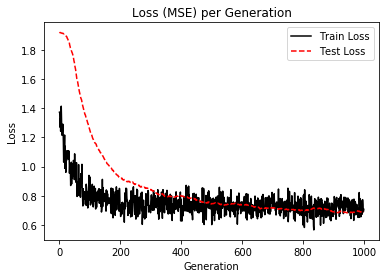

In [13]:
%matplotlib inline
# Plot loss (MSE) over time
plt.plot(train_loss, 'k-', label='Train Loss')
plt.plot(test_loss, 'r--', label='Test Loss')
plt.title('Loss (MSE) per Generation')
plt.legend(loc='upper right')
plt.xlabel('Generation')
plt.ylabel('Loss')
plt.show()

### Tensorboard Graph


What follows is the graph we have executed and all data about it. Note the "save" label.


![graph_3](../images/graph_3.png)


### Saving a Tensorflow model

So, now we have our model saved.

Tensorflow model has four main files:
* a) Meta graph:
This is a protocol buffer which saves the complete Tensorflow graph; i.e. all variables, operations, collections etc. This file has .meta extension.


* b) y c) Checkpoint files:
It is a binary file which contains all the values of the weights, biases, gradients and all the other variables saved. Tensorflow has changed from version 0.11. Instead of a single .ckpt file, we have now two files: .index and .data file that contains our training variables. 


* d) Along with this, Tensorflow also has a file named checkpoint which simply keeps a record of latest checkpoint files saved.



### Retrain the model


We can retrain the model as many times as we want to.

In [14]:
# Running a new session
print("Starting 2nd session...")
with tf.Session() as sess:
    # Initialize variables
    sess.run(init)

    # Restore model weights from previously saved model
    saver.restore(sess, model_path)
    print("Model restored from file: %s" % model_path)

    # Resume training
    for epoch in range(epochs):
        rand_index = np.random.choice(len(X_train), size=batch_size)
        X_rand = X_train_std[rand_index]
        y_rand = y_train_std[rand_index]
        #y_rand = np.transpose([y_train[rand_index]])
        sess.run(optimizer, feed_dict={X: X_rand, y: y_rand})

        train_temp_loss = sess.run(loss, feed_dict={X: X_rand, y: y_rand})
        train_loss.append(np.sqrt(train_temp_loss))
    
        test_temp_loss = sess.run(loss, feed_dict={X: X_test_std, y: y_test_std})
        test_loss.append(np.sqrt(test_temp_loss))
        if (epoch+1) % display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "Loss=", \
                "{:.9f}".format(train_temp_loss))

    # Close writer
    writer.flush()
    writer.close()
    
    # Save model weights to disk
    save_path = saver.save(sess, model_path)
    print("Model saved in file: %s" % save_path)
    print("Second Optimization Finished!")


Starting 2nd session...
INFO:tensorflow:Restoring parameters from /tmp/model.ckpt
Model restored from file: /tmp/model.ckpt
Epoch: 0050 Loss= 0.501028776
Epoch: 0100 Loss= 0.526981473
Epoch: 0150 Loss= 0.495494872
Epoch: 0200 Loss= 0.403977782
Epoch: 0250 Loss= 0.625274420
Epoch: 0300 Loss= 0.595013261
Epoch: 0350 Loss= 0.390508205
Epoch: 0400 Loss= 0.455603242
Epoch: 0450 Loss= 0.538071275
Epoch: 0500 Loss= 0.259512991
Epoch: 0550 Loss= 0.403911054
Epoch: 0600 Loss= 0.494841188
Epoch: 0650 Loss= 0.488838494
Epoch: 0700 Loss= 0.527527213
Epoch: 0750 Loss= 0.404275924
Epoch: 0800 Loss= 0.450985551
Epoch: 0850 Loss= 0.325873464
Epoch: 0900 Loss= 0.520956397
Epoch: 0950 Loss= 0.406218350
Epoch: 1000 Loss= 0.380938828
Model saved in file: /tmp/model.ckpt
Second Optimization Finished!


## Predict

Finally, we can use the model to make some predictions.

In [15]:
# Running a new session for predictions
print("Starting prediction session...")
with tf.Session() as sess:
    # Initialize variables
    sess.run(init)

    # Restore model weights from previously saved model
    saver.restore(sess, model_path)
    print("Model restored from file: %s" % model_path)

    # We try to predict the petal width (cm) of three samples
    #Caution!!! This data are not the right data (see below why)
    feed_dict = {X: [[5.1, 3.5, 1.4],
                     [4.8, 3.0, 1.4],
                     [6.3, 3.4, 5.6]]
                }
    prediction = sess.run(y_hat, feed_dict)
    print(prediction) # True value 0.2, 0.1, 2.4


Starting prediction session...
INFO:tensorflow:Restoring parameters from /tmp/model.ckpt
Model restored from file: /tmp/model.ckpt
[[1.2619315]
 [1.2590624]
 [4.0073366]]


OK, not very good results. But it is worst that we could think!
Data are not right because we have trained our model with a transformed data (standardization) and now we must
use again transformed data to make predictions. Also wi will get back transformed data again. So, we must inverse the transformation to get the original kind of data.

First: transform our original data. The data we want to make the prediction about.

In [16]:
X_pred = [[5.1, 3.5, 1.4],
          [4.8, 3.0, 1.4],
          [6.3, 3.4, 5.6]]

In [17]:
X_pred_std = sc.transform(X_pred)
X_pred_std

array([[6.86549436, 4.28228483, 0.89182234],
       [6.38114257, 3.47503186, 0.89182234],
       [8.8029015 , 4.12083424, 7.67274733]])

Second: we are ready to make the predictions

In [18]:
# Running a new session for predictions
print("Starting prediction session...")
with tf.Session() as sess:
    # Initialize variables
    sess.run(init)

    # Restore model weights from previously saved model
    saver.restore(sess, model_path)
    print("Model restored from file: %s" % model_path)

    # We try to predict the petal width (cm) of three samples
    feed_dict_std = {X: [[6.86549436, 4.28228483, 0.89182234],
       [6.38114257, 3.47503186, 0.89182234],
       [8.8029015 , 4.12083424, 7.67274733]]}
    prediction = sess.run(y_hat, feed_dict_std)
    print(prediction) # True value 0.2, 0.1, 2.4


Starting prediction session...
INFO:tensorflow:Restoring parameters from /tmp/model.ckpt
Model restored from file: /tmp/model.ckpt
[[1.0284168]
 [1.0237845]
 [5.3811445]]


Third: we reverse the transformation

In [19]:
y_hat_rev = sc.inverse_transform(prediction)
y_hat_rev

array([[1.4846045],
       [1.4817353],
       [4.1806164]], dtype=float32)

Not bad. We'll try to improve them with a deeper network. That is the goal of the next notebook.